In [4]:
# import requests
# import json
# import pandas as pd

# # base currency or reference currency
# base="USD"

# # required currency for plot
# out_curr="MYR"

# # exchange data from a date
# start_date="2022-07-01"

# # exchange data till a date
# end_date="2023-05-31"

# # api url for request 
# url = 'https://api.exchangerate.host/timeseries?base={0}&start_date={1}&end_date={2}&symbols={3}'.format(base,start_date,end_date,out_curr)
# response = requests.get(url)

# # retrive response in json format
# data = response.json()

# rates1=[]
# # extract dates and rates from each item of dictionary or json in the above created list
# for i,j in data["rates"].items():
#       rates1.append([i,j[out_curr]])

# df=pd.DataFrame(rates1)
# df.columns=["date","rate"]
# df

In [ ]:
base="GBP"

# required currency for plot
out_curr="MYR"

# exchange data from a date
start_date="2022-07-01"

# exchange data till a date
end_date="2023-05-31"

# api url for request 
url = 'https://api.exchangerate.host/timeseries?base={0}&start_date={1}&end_date={2}&symbols={3}'.format(base,start_date,end_date,out_curr)
response = requests.get(url)

# retrive response in json format
data = response.json()

rates2=[]
# extract dates and rates from each item of dictionary or json in the above created list
for i,j in data["rates"].items():
      rates2.append(j[out_curr])
print(rates2)

In [14]:
import pandas as pd
import json
import requests

def fetch_exchange_rates(base, out_curr, start_date, end_date):
    # API URL for request
    url = 'https://api.exchangerate.host/timeseries?base={0}&start_date={1}&end_date={2}&symbols={3}'.format(base, start_date, end_date, out_curr)
    
    # Send request to the API
    response = requests.get(url)
    
    # Retrieve response in JSON format
    data = response.json()

    rates = []
    # Extract dates and rates from each item in the response
    for date, rate in data["rates"].items():
        rates.append([date, rate[out_curr]])

    # Create a DataFrame from the rates list
    df = pd.DataFrame(rates, columns=["date", base])
    
    return df

# List of parameter values
base_currencies = ["USD"]
output_currency = "CNY"
start_date = "2005-01-01"
end_date = "2023-05-31"

# Initialize an empty DataFrame
combined_df = None

# Loop over the base currencies
for base_currency in base_currencies:
    exchange_rates_df = fetch_exchange_rates(base_currency, output_currency, start_date, end_date)
    if combined_df is None:
        combined_df = exchange_rates_df
    else:
        combined_df = pd.merge(combined_df, exchange_rates_df, on="date", how="outer")







In [15]:
combined_df
# combined_df.to_excel(r'C:\Users\459354\Desktop\VECM\rates.xlsx', index =False)

,date,USD
0,2005-01-01,8.081238
1,2005-01-02,8.081238
2,2005-01-03,8.266592
3,2005-01-04,8.275486
4,2005-01-05,8.269880
...,...,...
361,2005-12-28,8.075371
362,2005-12-29,8.050464
363,2005-12-30,8.052952
364,2005-12-31,8.052952


In [52]:
combined_df_1 = combined_df.set_index('date')
combined_df_1

,USD,EUR,GBP,SGD,BND,THB,HKD,IDR,VND,CNY,PHP,LAK,JPY
date,,,,,,,,,,,,,
2022-07-01,4.404037,4.594196,5.330510,3.155606,3.160003,0.123938,0.561664,0.000294,0.000189,0.657627,0.080021,0.000294,0.032591
2022-07-02,4.405655,4.592881,5.329500,3.156641,3.159779,0.123947,0.561685,0.000294,0.000189,0.657611,0.080027,0.000294,0.032593
2022-07-03,4.404568,4.599142,5.329983,3.158198,3.160067,0.124031,0.561637,0.000295,0.000189,0.657735,0.079998,0.000294,0.032615
2022-07-04,4.410908,4.598944,5.342366,3.163137,3.162716,0.123729,0.562516,0.000294,0.000189,0.658745,0.080197,0.000294,0.032525
2022-07-05,4.416566,4.536650,5.279795,3.144596,3.149616,0.122907,0.563274,0.000294,0.000189,0.657684,0.079371,0.000294,0.032566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,4.597784,4.934674,5.678174,3.407157,3.403228,0.132542,0.587440,0.000307,0.000196,0.651307,0.082326,0.000260,0.032713
2023-05-28,4.599580,4.928333,5.678455,3.400424,3.398655,0.132408,0.587314,0.000307,0.000196,0.651291,0.082298,0.000260,0.032687
2023-05-29,4.601617,4.927829,5.685984,3.400692,3.402426,0.132714,0.588254,0.000308,0.000196,0.651066,0.082184,0.000260,0.032775


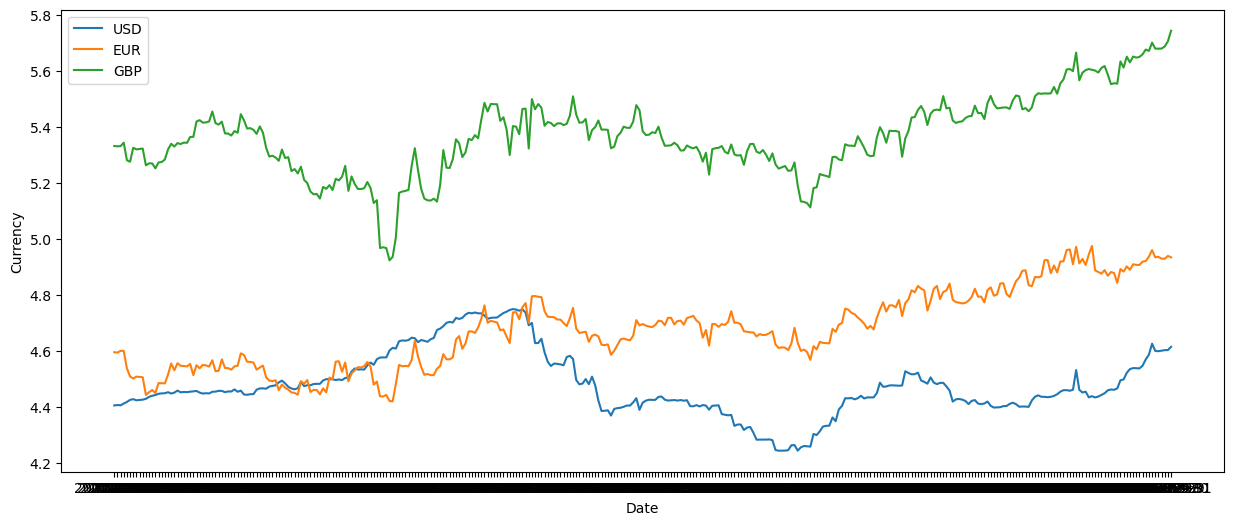

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 6))

# Create line chart
plt.plot(combined_df['date'], combined_df['USD'], label='USD')
plt.plot(combined_df['date'], combined_df['EUR'], label='EUR')
plt.plot(combined_df['date'], combined_df['GBP'], label='GBP')
# plt.plot(combined_df['date'], combined_df['CNY'], label='CNY')
# plt.plot(combined_df['date'], combined_df['SGD'], label='SGD')
# plt.plot(combined_df['date'], combined_df['BND'], label='BND')
# plt.plot(combined_df['date'], combined_df['THB'], label='THB')
# plt.plot(combined_df['date'], combined_df['HKD'], label='HKD')
# plt.plot(combined_df['date'], combined_df['IDR'], label='IDR')
# plt.plot(combined_df['date'], combined_df['VND'], label='VND')
# plt.plot(combined_df['date'], combined_df['PHP'], label='PHP')
# plt.plot(combined_df['date'], combined_df['LAK'], label='LAK')


# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Currency')

plt.legend()

# Display the chart
plt.show()


In [54]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in combined_df_1.iteritems():
    adfuller_test(column, name=column.name)
    print()

    Augmented Dickey-Fuller Test on "USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9685
 No. Lags Chosen       = 8
 Critical value 1%     = -3.451
 Critical value 5%     = -2.87
 Critical value 10%    = -2.572
 => P-Value = 0.3006. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.

    Augmented Dickey-Fuller Test on "EUR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.8102
 No. Lags Chosen       = 2
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.8161. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.

    Augmented Dickey-Fuller Test on "GBP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-

In [55]:
# First Differencing
df_diff = combined_df_1.diff()
df_diff

,USD,EUR,GBP,SGD,BND,THB,HKD,IDR,VND,CNY,PHP,LAK,JPY
date,,,,,,,,,,,,,
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-02,0.001618,-0.001315,-0.001010,0.001035,-0.000224,0.000009,0.000021,0.000000,0.0,-0.000016,0.000006,0.000000e+00,0.000002
2022-07-03,-0.001087,0.006261,0.000483,0.001557,0.000288,0.000084,-0.000048,0.000001,0.0,0.000124,-0.000029,0.000000e+00,0.000022
2022-07-04,0.006340,-0.000198,0.012383,0.004939,0.002649,-0.000302,0.000879,-0.000001,0.0,0.001010,0.000199,0.000000e+00,-0.000090
2022-07-05,0.005658,-0.062294,-0.062571,-0.018541,-0.013100,-0.000822,0.000758,0.000000,0.0,-0.001061,-0.000826,0.000000e+00,0.000041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,-0.001034,0.001506,-0.000128,0.000910,0.000096,0.000011,0.000015,0.000000,0.0,0.000039,0.000006,0.000000e+00,0.000002
2023-05-28,0.001796,-0.006341,0.000281,-0.006733,-0.004573,-0.000134,-0.000126,0.000000,0.0,-0.000016,-0.000028,0.000000e+00,-0.000026
2023-05-29,0.002037,-0.000504,0.007529,0.000268,0.003771,0.000306,0.000940,0.000001,0.0,-0.000225,-0.000114,0.000000e+00,0.000088


In [56]:
df_diff= df_diff.iloc[1:]
df_diff

,USD,EUR,GBP,SGD,BND,THB,HKD,IDR,VND,CNY,PHP,LAK,JPY
date,,,,,,,,,,,,,
2022-07-02,0.001618,-0.001315,-0.001010,0.001035,-0.000224,0.000009,0.000021,0.000000,0.0,-0.000016,0.000006,0.000000e+00,0.000002
2022-07-03,-0.001087,0.006261,0.000483,0.001557,0.000288,0.000084,-0.000048,0.000001,0.0,0.000124,-0.000029,0.000000e+00,0.000022
2022-07-04,0.006340,-0.000198,0.012383,0.004939,0.002649,-0.000302,0.000879,-0.000001,0.0,0.001010,0.000199,0.000000e+00,-0.000090
2022-07-05,0.005658,-0.062294,-0.062571,-0.018541,-0.013100,-0.000822,0.000758,0.000000,0.0,-0.001061,-0.000826,0.000000e+00,0.000041
2022-07-06,0.007446,-0.029330,-0.005447,0.005645,0.000310,-0.000616,0.000659,0.000001,0.0,0.001977,-0.000316,1.000000e-06,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,-0.001034,0.001506,-0.000128,0.000910,0.000096,0.000011,0.000015,0.000000,0.0,0.000039,0.000006,0.000000e+00,0.000002
2023-05-28,0.001796,-0.006341,0.000281,-0.006733,-0.004573,-0.000134,-0.000126,0.000000,0.0,-0.000016,-0.000028,0.000000e+00,-0.000026
2023-05-29,0.002037,-0.000504,0.007529,0.000268,0.003771,0.000306,0.000940,0.000001,0.0,-0.000225,-0.000114,0.000000e+00,0.000088


In [57]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in df_diff.iteritems():
    adfuller_test(column, name=column.name)
    print()

    Augmented Dickey-Fuller Test on "USD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.2253
 No. Lags Chosen       = 7
 Critical value 1%     = -3.451
 Critical value 5%     = -2.87
 Critical value 10%    = -2.572
 => P-Value = 0.0006. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "EUR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.5423
 No. Lags Chosen       = 1
 Critical value 1%     = -3.45
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "GBP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

In [ ]:
#These results indicate that the series may follow a long-term
#equilibrium path, although in the short term they diverge
#substantially from equilibrium. The study of long-term
#relationships between time series is fundamental to study
#cointegration between the different markets.

#ARIMA(p, 1, q), where p represents the autoregressive component, 1 represents the order of differencing, and q represents the moving average component.

In [58]:
from statsmodels.tsa.stattools import kpss
def kpss_test(x, h0_type='c'):
    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type, nlags ='auto')
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value
        return results
print('KPSS-USDMYR:')
print(kpss_test(combined_df_1.USD))
# print('___________________')
# print('KPSS-GBPUSD:')
# print(kpss_test(X.gbpusd))
# print('___________________')
# print('KPSS-USDJPY:')
# print(kpss_test(X.usdjpy))
# print('___________________')
# print('KPSS-GC:')
# print(kpss_test(X.gc))
# print('___________________')
# print('KPSS-NQ:')
# print(kpss_test(X.nq))
# print('___________________')
# print('KPSS-ES:')
# print(kpss_test(X.es))

KPSS-EURUSD:
Test Statistic           0.478315
p-value                  0.046551
# of Lags               11.000000
Critical Value (10%)     0.347000
dtype: float64
